In [16]:
#import pip
#pip.main(['install','seaborn']);
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

MIDNIGHT = 24*60*60

def return_activity_duration(start_time, end_time):
    if(start_time == np.nan or end_time == np.nan):
        return np.nan
    
    if(start_time > end_time):
        return abs(start_time + (MIDNIGHT - end_time))

    return abs(end_time - start_time)
#output_path = 'C:\\Users\\Anna\\Metacity\\Metacity-SynthPop\\output\\'
output_path = "/home/metamat/anicka/Metacity-SynthPop/output/"

##

# Srovnání syntetické populace a vstupních dat

## Načtení HTS dat

In [17]:
df_hts = pd.read_csv(output_path+'csv/clean_hts_matched.csv', index_col=[0])
display(df_hts.head(2))

,traveler_id,household_id,sex,age,employment,trip_today,age_class,district_name
0,1,1306,M,12,student,True,0,Praha-Čakovice
1,2,1306,F,46,employed,True,3,Praha-Čakovice


## Načtení dat SLDB 2011

In [18]:
df = pd.read_csv(output_path+'csv/clean_census_matched.csv', index_col=[0])
display(df.head(2))


,person_id,zone_id,sex,age,employment,age_class,district_name
0,1,554782423,F,34,employed,2,Praha-Libuš
1,19,554782423,F,29,employed,1,Praha-Libuš


## Porovnání základních údajů

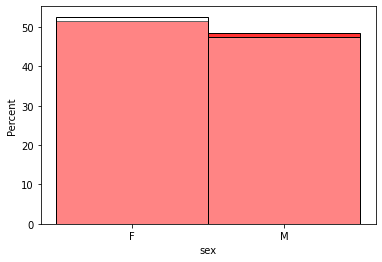

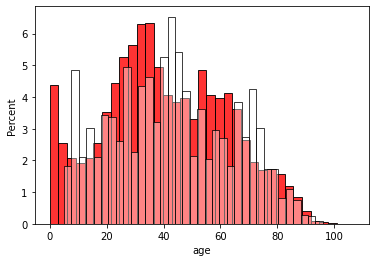

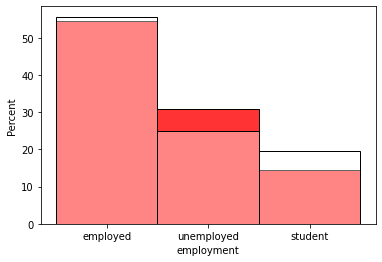

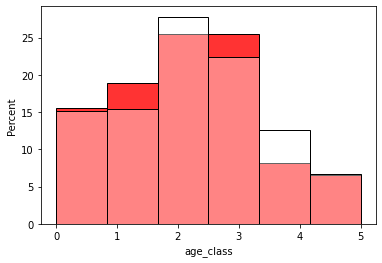

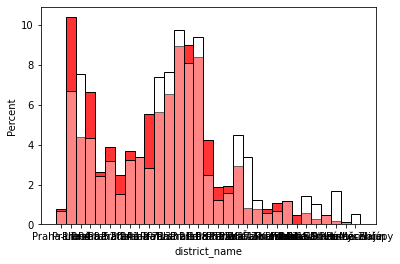

In [19]:
for column in ["sex","age","employment","age_class","district_name"]:
    sns.histplot(x=column, data=df, stat='percent', bins=min(35, len(df[column].unique())), alpha=0.8, color="red")
    sns.histplot(x=column, data=df_hts, stat='percent', bins=min(35, len(df_hts[column].unique())), alpha=0.4, color="white")
    plt.savefig(output_path+'png/comparison_'+column+'.png')
    plt.show()

### Age split and socioeconomic status by age

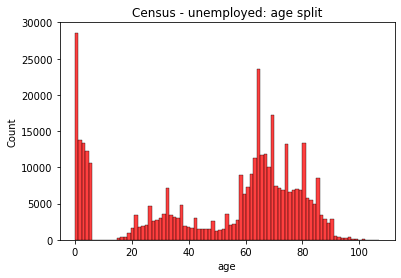

In [20]:
df_unemployed = df[df.employment == "unemployed"]
g = sns.histplot(x="age", data=df_unemployed, color="red")
g.set_title("Census - unemployed: age split")
plt.show()

In [21]:
df_c = pd.DataFrame()
df_c["age"] = df.age.values
df_c["sex"] = df.sex.values
df_c["employment"] = df.employment.values
df_c["type"] = "census"

df_h = pd.DataFrame()
df_h["age"] = df_hts.age.values
df_h["sex"] = df_hts.sex.values
df_h["employment"] = df_hts.employment.values
df_h["type"] = "HTS"

df2 = pd.concat([df_c,df_h])


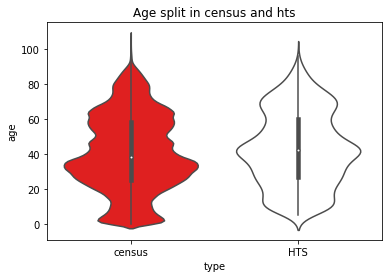

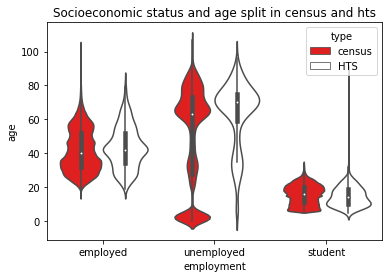

In [22]:
g = sns.violinplot(x="type", y="age", palette=["r","w"], data=df2)
g.set_title("Age split in census and hts")
plt.savefig(output_path+'png/comparison_age_split.png')
plt.show()
g = sns.violinplot(x="employment", y="age", hue="type", palette=["r","w"], data=df2)
g.set_title("Socioeconomic status and age split in census and hts")
plt.savefig(output_path+'png/comparison_age_se_status_split.png')
plt.show()

## Activity chains in HTS and SynthPop

### Načtení dat z HTS

In [24]:
hts_trips = pd.read_csv(output_path+'csv/hts_trips_extracted.csv')
hts_activities = pd.read_csv(output_path+'csv/hts_activities_extracted.csv')
hts_activities["o_order"] = hts_activities.activity_order.values
hts_activities["d_order"] = hts_activities.activity_order.values
hts_activities["duration_m"] = hts_activities.apply(lambda row: return_activity_duration(row.start_time, row.end_time), axis=1)/60
hts_trips["o_order"] = hts_trips.trip_order
hts_trips["d_order"] = hts_trips.trip_order + 1


hts_joined_origin = hts_activities.merge(hts_trips, on=["traveler_id", "o_order"])
hts_joined_dest = hts_activities.merge(hts_trips, on=["traveler_id", "d_order"])

traveler_ids = hts_activities.traveler_id.unique()

display(hts_activities.head(2))
display(hts_trips.head(2))
display(hts_joined_origin.head(2))

,Unnamed: 0,traveler_id,purpose,start_time,end_time,activity_order,o_order,d_order,duration_m
0,0,1,home,NaN,27000.0,0,0,0,NaN
1,1,1,education,27900.0,50400.0,1,1,1,375.0


,Unnamed: 0,traveler_id,traveling_mode,trip_order,o_order,d_order
0,0,1,pt,0,0,1
1,1,1,pt,1,1,2


,Unnamed: 0_x,traveler_id,purpose,start_time,end_time,activity_order,o_order,d_order_x,duration_m,Unnamed: 0_y,traveling_mode,trip_order,d_order_y
0,0,1,home,NaN,27000.0,0,0,0,NaN,0,pt,0,1
1,1,1,education,27900.0,50400.0,1,1,1,375.0,1,pt,1,2


## Načtení dat SynthPop

In [26]:
df_persons = pd.read_csv(output_path+'csv/df_persons.csv', index_col=[0])
df_persons.set_index("person_id", drop=True, inplace=True)
df_activities = pd.read_csv(output_path+'csv/df_activities.csv', index_col=[0])
df_trips = pd.read_csv(output_path+'csv/df_trips.csv', index_col=[0])

df_activities["o_order"] = df_activities.activity_order.values
df_activities["d_order"] = df_activities.activity_order.values
df_trips["o_order"] = df_trips.trip_order
df_trips["d_order"] = df_trips.trip_order + 1
df_joined_origin = df_activities.merge(df_trips, on=["person_id", "o_order"])
df_joined_dest = df_activities.merge(df_trips, on=["person_id", "d_order"])

df_activities = df_activities.merge(df_persons, on="person_id")
#df_merged = df_persons.merge(df_activities, on="person_id")


traveler_ids = df_activities.person_id.unique()
df_travelers = df_activities.groupby("person_id")

display(df_persons.head(2))
display(df_activities.head(2))
display(df_trips.head(2))

,trip_today,car_avail,driving_license
person_id,,,
1,True,False,False
231704,True,False,False


,person_id,purpose,start_time,end_time,activity_order,geometry,location_id,duration_m,departure_order,o_order,d_order,trip_today,car_avail,driving_license
0,1,home,NaN,32138.0,0,POINT (741081.2944470095 1053674.974826472),14165,NaN,-1,0,0,True,False,False
1,1,work,34624.0,54725.0,1,POINT (737592.1799999997 1041624.149999999),NaN,335.016667,0,1,1,True,False,False


,person_id,mode,trip_order,start,preceeding_purpose,preceeding_purpose_coords,end,following_purpose,following_purpose_coords,travel_time,beeline,trip_id,o_order,d_order
0,1,pt,0,32138.0,home,POINT (741081.2944470095 1053674.974826472),34624.0,work,POINT (737592.1799999997 1041624.149999999),2486.0,12545.768156,0,0,1
1,1,pt,1,54725.0,work,POINT (737592.1799999997 1041624.149999999),57210.0,home,POINT (741081.2944470095 1053674.974826472),2485.0,12545.768156,1,1,2


In [ ]:
### Comparison: Activity duration

In [43]:
def side_by_side(plots):
    
    #plt.figure(figsize = (40,8))
    figure, axes = plt.subplots(1, len(plots))

    for e,df in enumerate(plots):
        sns.histplot(df, ax=axes[e])

    plt.show()




home


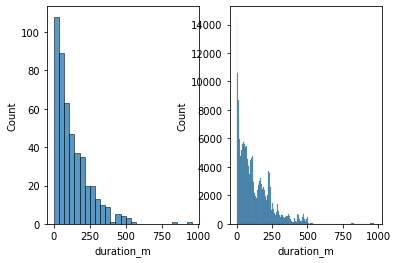

work


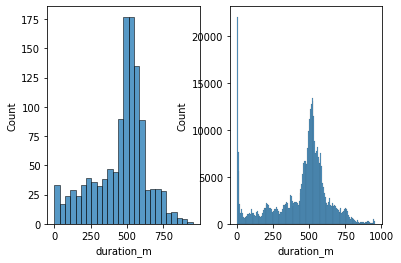

leisure


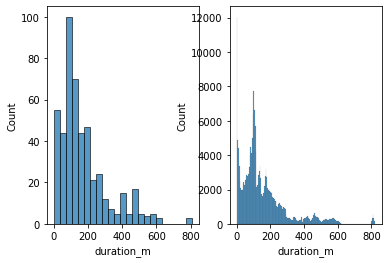

other


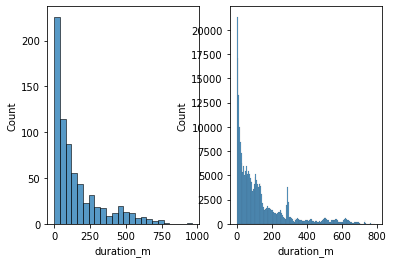

shop


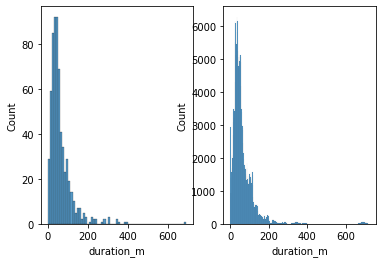

education


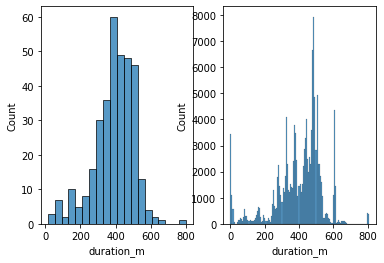

In [44]:
purposes = df_activities.purpose.unique()
for mode in purposes:
    print(mode)
    hts = hts_activities[hts_activities.purpose == mode]
    df = df_activities[df_activities.purpose == mode]
    
    side_by_side([hts.duration_m, df.duration_m])